## Lets import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Time to get the raw data

In [2]:
raw_data = pd.read_csv(r'C:\Users\asher\OneDrive\Desktop\Data\netflix_titles.csv')

In [3]:
raw_data.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

## Time to do some data cleaning!

In [4]:
raw_data.describe(include='all')

show_id   type   title                director  \
count   6.234000e+03   6234    6234                    4265   
unique           NaN      2    6172                    3301   
top              NaN  Movie  Tunnel  Raúl Campos, Jan Suter   
freq             NaN   4265       3                      18   
mean    7.670368e+07    NaN     NaN                     NaN   
std     1.094296e+07    NaN     NaN                     NaN   
min     2.477470e+05    NaN     NaN                     NaN   
25%     8.003580e+07    NaN     NaN                     NaN   
50%     8.016337e+07    NaN     NaN                     NaN   
75%     8.024489e+07    NaN     NaN                     NaN   
max     8.123573e+07    NaN     NaN                     NaN   

                      cast        country       date_added  release_year  \
count                 5664           5758             6223    6234.00000   
unique                5469            554             1524           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    18           2032              122           NaN   
mean                   NaN            NaN              NaN    2013.35932   
std                    NaN            NaN              NaN       8.81162   
min                    NaN            NaN              NaN    1925.00000   
25%                    NaN            NaN              NaN    2013.00000   
50%                    NaN            NaN              NaN    2016.00000   
75%                    NaN            NaN              NaN    2018.00000   
max                    NaN            NaN              NaN    2020.00000   

       rating  duration      listed_in  \
count    6224      6234           6234   
unique     14       201            461   
top     TV-MA  1 Season  Documentaries   
freq     2027      1321            299   
mean      NaN       NaN            NaN   
std       NaN       NaN            NaN   
min       NaN       NaN            NaN   
25%       NaN       NaN            NaN   
50%       NaN       NaN            NaN   
75%       NaN       NaN            NaN   
max       NaN       NaN            NaN   

                                              description  
count                                                6234  
unique                                               6226  
top     A surly septuagenarian gets another chance at ...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [5]:
data = raw_data.drop(['show_id','description'],axis = 1)
data.describe(include='all')

type   title                director                cast  \
count    6234    6234                    4265                5664   
unique      2    6172                    3301                5469   
top     Movie  Tunnel  Raúl Campos, Jan Suter  David Attenborough   
freq     4265       3                      18                  18   
mean      NaN     NaN                     NaN                 NaN   
std       NaN     NaN                     NaN                 NaN   
min       NaN     NaN                     NaN                 NaN   
25%       NaN     NaN                     NaN                 NaN   
50%       NaN     NaN                     NaN                 NaN   
75%       NaN     NaN                     NaN                 NaN   
max       NaN     NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            5758             6223    6234.00000   6224      6234   
unique            554             1524           NaN     14       201   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2032              122           NaN   2027      1321   
mean              NaN              NaN    2013.35932    NaN       NaN   
std               NaN              NaN       8.81162    NaN       NaN   
min               NaN              NaN    1925.00000    NaN       NaN   
25%               NaN              NaN    2013.00000    NaN       NaN   
50%               NaN              NaN    2016.00000    NaN       NaN   
75%               NaN              NaN    2018.00000    NaN       NaN   
max               NaN              NaN    2020.00000    NaN       NaN   

            listed_in  
count            6234  
unique            461  
top     Documentaries  
freq              299  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN

## Now let's deal with those missing values

In [6]:
data.isnull().sum()

type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis = 0)

In [8]:
data_no_mv.describe(include = 'all')

type        title                director         cast  \
count    3774         3774                    3774         3774   
unique      2         3752                    2920         3667   
top     Movie  The Silence  Raúl Campos, Jan Suter  Samuel West   
freq     3678            3                      18           10   
mean      NaN          NaN                     NaN          NaN   
std       NaN          NaN                     NaN          NaN   
min       NaN          NaN                     NaN          NaN   
25%       NaN          NaN                     NaN          NaN   
50%       NaN          NaN                     NaN          NaN   
75%       NaN          NaN                     NaN          NaN   
max       NaN          NaN                     NaN          NaN   

              country       date_added  release_year rating duration  \
count            3774             3774   3774.000000   3774     3774   
unique            433             1014           NaN     14      184   
top     United States  January 1, 2020           NaN  TV-MA   90 min   
freq             1323              105           NaN   1189       93   
mean              NaN              NaN   2012.087440    NaN      NaN   
std               NaN              NaN      9.566944    NaN      NaN   
min               NaN              NaN   1942.000000    NaN      NaN   
25%               NaN              NaN   2011.000000    NaN      NaN   
50%               NaN              NaN   2016.000000    NaN      NaN   
75%               NaN              NaN   2017.000000    NaN      NaN   
max               NaN              NaN   2020.000000    NaN      NaN   

                           listed_in  
count                           3774  
unique                           296  
top     Dramas, International Movies  
freq                             237  
mean                             NaN  
std                              NaN  
min                              NaN  
25%                              NaN  
50%                              NaN  
75%                              NaN  
max                              NaN

In [9]:
data_no_mv.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## Time to visualize some data

In [10]:
data_no_mv.head()

type                                    title  \
0  Movie  Norm of the North: King Sized Adventure   
4  Movie                             #realityhigh   
6  Movie                                 Automata   
7  Movie       Fabrizio Copano: Solo pienso en mi   
9  Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   
9                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country         date_added  \
0        United States, India, South Korea, China  September 9, 2019   
4                                   United States  September 8, 2017   
6          Bulgaria, United States, Spain, Canada  September 8, 2017   
7                                           Chile  September 8, 2017   
9  United States, United Kingdom, Denmark, Sweden  September 8, 2017   

   release_year rating duration  \
0          2019  TV-PG   90 min   
4          2017  TV-14   99 min   
6          2014      R  110 min   
7          2017  TV-MA   60 min   
9          2014      R   90 min   

                                           listed_in  
0                 Children & Family Movies, Comedies  
4                                           Comedies  
6  International Movies, Sci-Fi & Fantasy, Thrillers  
7                                    Stand-Up Comedy  
9                      Action & Adventure, Thrillers

##  Movies Vs Shows on Netflix

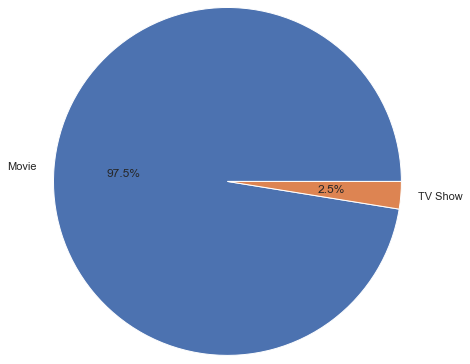

In [63]:
type_sum = data_no_mv['type'].value_counts()
type_sum

plt.pie(type_sum,labels = type_sum.index, autopct = '%.1f%%',radius =2)
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.show()

## Ratings on Netflix

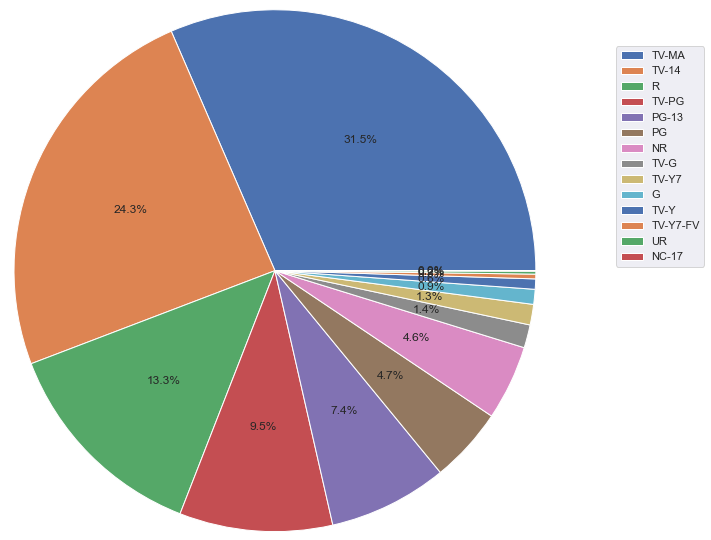

In [52]:
rating_sum = data_no_mv['rating'].value_counts()
rating_sum
plt.pie(rating_sum, autopct = '%.1f%%',radius =3 )
plt.legend(labels = rating_sum.index,bbox_to_anchor= (2.5,1.025),loc = 'center right')
fig = plt.gcf()
plt.show()

## Probability distribution of releases through the years

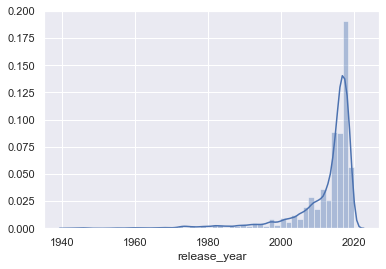

In [67]:
sns.distplot(data_no_mv['release_year'])

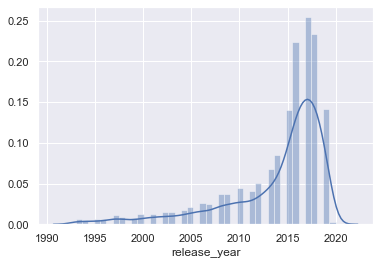

In [72]:
q = data_no_mv['release_year'].quantile(.05)
data_update = data_no_mv[data_no_mv['release_year'] > q]
sns.distplot(data_update['release_year'])